# Homework 2 - The Best Books of All Time

Books are essential to human life, offering knowledge, escapism, and lifelong companionship. They hold the collective wisdom of humanity, providing insight, inspiration, and an enduring connection to our shared human experience. In this engaging data analysis homework, you'll be (deep) diving into a rich dataset focused on books. Your objective is to extract valuable insights and patterns, exploring genres, authors, publication dates, ratings, and more. You aim to uncover trends and correlations through rigorous analysis and visualization, shedding light on the diverse literature landscape. Join us in this analytical journey as we decode the fascinating world of books using the power of data!

Assume you and your team work for a company that is interested in analyzing all this book data to understand better the evolution of the market of readers and authors throughout history. They want to understand it to make decisions that might affect the success of the so-called company.

Your **goal** is to answer the Research Questions (RQs) that may help discover and interpret meaningful data patterns and eventually understand how readers and authors behave.




#### Team Members:
- Yousef Kanj Kanj.2113258@studenti.uniroma1.it
- Francesco Sbordone sbordone.1969896@studenti.uniroma1.it 
- Paolo Zilviano zilviano.1916518@studenti.uniroma1.it 
- Nadir Nuralin nadir.nuralin@alumni.nu.edu.kz 

## Before Starting

Among all the numerous things and good practices a Data Scientist needs to do before running any analysis, there is one of uttermost importance: **get the data and understand it**! 

Here, you find the list of tasks you must perform before getting your hands on the actual data and into this world of literature.

* **Get your data!** You must use the files [lighter_authors.json](https://adm2023.s3.amazonaws.com/lighter_authors.json) and [lighter_books.json](https://adm2023.s3.amazonaws.com/lighter_books.json) (LINKS UPDATED), which are random samples we draw for you to work with. Notice that the mentioned data is based on [this website](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries).
* **Understand your data.** Read the name of each file to understand what it refers to, dig into its structure, and read the description on the page where the data is available. Please be sure that you've understood the data before starting coding.
* **Handling the data.** The data are provided in many '.json' files. To answer the RQs, we kindly suggest you look for ways to handle this type of data and then perform the necessary operations based on what you want to analyze.
  
Friendly reminder: **Internet** is your friend, and it may be the source of the answer you may have along this and many other projects!

----

# VERY VERY IMPORTANT
1. **!!! Read the entire homework before coding anything!!!**
2. *My solution is not better than yours, and yours is not better than mine*. In any data analysis task, there **is no** unique way to answer RQs. For this reason, it is crucial (**necessary and mandatory**) that you describe any single decision you take and all your steps.
3. Once solving an exercise, comments about the obtained results are **mandatory**. We are not always explicit about where to focus your comments, but we will always want brief sentences about your discoveries.
4. We encourage using chatGPT (Bard, Bing, or any other Large Language Models (LLM) chatbot tool) as allies to help you solve your homework, and we were hoping you could learn how to use them properly. However, **using such tools when not explicitly allowed will be considered plagiarism and strictly prohibited**. 

____

## Importing Data
Done by: Yousef 


In [ ]:
# First, we need to load in the data and clean it from extra columns not required by the homework to make it easier to load
# The datasets we will be using are Lighter-books and Lighter_authors
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# we split the file by chunks to make sure it doesn't overload our RAM
chunksize = 100000
chunk_list = []

chunks = pd.read_json(r"./lighter_authors.json", lines=True, chunksize=chunksize)
columns_to_drop = ['image_url']

# I added a counter to identify if an error occured, when did it occur

for chunk in tqdm(chunks):
    chunk.drop(columns=columns_to_drop, inplace=True)
    chunk = chunk[chunk['name'].notna()]
    chunk_list.append(chunk)

   
authors = pd.concat(chunk_list, ignore_index=True)
authors = authors.sort_values(by="works_count", ascending=False)

# I deleted all instances of books called NOT A BOOK, wikipedia, anonymous, unknown, 

condition = ~authors["name"].isin(["NOT A BOOK", "Unknown", "Source Wikipedia", "Anonymous"])

authors = authors[condition]

# we reset the index of the dataframe to organize it
authors.reset_index(drop=True, inplace=True)

In [ ]:
#After cleaning the data, I saved it back as a json file to work on for the rest of the assignment
file_path = r"lighter_authors_cleaned.json"
authors.to_json(file_path, orient='records', lines=True)
print(authors.info, authors.head)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

chunksize = 10000
chunk_list = []

chunks = pd.read_json(r"./lighter_books.json", lines=True, chunksize=chunksize)
# again we drop the columns not needed
columns_to_drop = ['authors', 'isbn', 'isbn13', 'asin', 'edition_information', 'publisher', 'shelves']

for chunk in tqdm(chunks):
    chunk.drop(columns=columns_to_drop, inplace=True)
    chunk = chunk[chunk['title'].notna()]
    chunk_list.append(chunk)

books = pd.concat(chunk_list, ignore_index=True)

0it [00:00, ?it/s]

703it [05:51,  2.00it/s]


____


## Understanding our new columns
Displaying the columns we have available allows us to understand how the data is organized.


In [3]:
for column in authors.columns:
    print(column)
    

ratings_count
average_rating
text_reviews_count
work_ids
book_ids
works_count
id
name
gender
about
fans_count


In [4]:
for column in books.columns:
    print(column)


id
title
author_name
author_id
work_id
language
average_rating
rating_dist
ratings_count
text_reviews_count
publication_date
original_publication_date
format
image_url
num_pages
series_id
series_name
series_position
description


____

1. [__RQ1__] *Exploratory Data Analysis (EDA)* - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.


____
Done by: Paolo
####     Authors

In [5]:
# This table has 12 variables (columns) and 351767 authors (rows).
# Each author has an id and a list of works/books belonging to him.
# In this table we can see also the average rating of an author's works 
# as well as other relevant data as the overall number of ratings, the number of 
# text reviews and the fans count.

print(authors.dtypes)
print(authors.shape)

ratings_count           int64
average_rating        float64
text_reviews_count      int64
work_ids               object
book_ids               object
works_count             int64
id                      int64
name                   object
gender                 object
about                  object
fans_count              int64
dtype: object
(351763, 11)


In [6]:
# let's have a look at the structure of this table

authors.head(1)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
0,8510,4.02,527,"[21723362, 22939358, 22945924, 22579311, 22982...","[15971714, 16706030, 16712573, 16392251, 16739...",186086,5823409,Jesse Russell,male,"Bookvika Publishing, VSD, Book on Demand Ltd —...",164


In [7]:
# Apart from the 'id' column we can provide meaningful statistics for the quantitative variables, it is
# to say 'ratings_count', 'average_rating', 'text_reviews_count', 'works_count' and finally 'fans_count'

# ratings count

authors.ratings_count.describe().apply(lambda x: '%.2f' % x)

count      351763.00
mean         4764.97
std         97661.96
min           -41.00
25%             6.00
50%            39.00
75%           310.00
max      27003752.00
Name: ratings_count, dtype: object

In [8]:
# we can see that the minimum value is negative, so we spotted the first anomaly in the data set
# let's check which authors have a negative ratings number
authors[authors['ratings_count'] < 0]  # not so much but we have to drop those columns

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
62276,-2,-31.00,15,"[42967430, 42991072, 25516741, 42954314, 25756...","[23403731, 23430574, 18158801, 23397577, 18282...",22,7159944,cloudyjenn,female,"<a target=""_blank"" rel=""noopener nofollow"" hre...",5
95954,-41,2.98,0,"[52260174, 52912736, 52260220, 70529262, 52260...","[31571799, 32285207, 31571828, 45733772, 31571...",13,15649273,Iincho,,Name (in native language): いいんちょ<br /><br />Ci...,0
286255,-3,2.33,0,"[52359028, 52358835]","[31685767, 31685613]",2,15679447,Sein Anji,,Name (in native language): 星名あんじ<br />Kiseiya ...,0
304239,-5,3.00,0,[53488797],[32878152],1,16050319,Moonlit Stardust,,A fanfic author with nothing but time and medi...,3


In [9]:
# We make sure to replace all wrong or 0 values by None when needed, this allows us to not skew any statistical data while still maintaining
# the change to work with this data in other parts if it can be suitable
authors["ratings_count"] = authors.ratings_count.apply(lambda x: None if x<0 else x)

In [10]:
# average_rating
# we can observe that the ratings go from 1 to 5, 0 rating means it was never rated and so was replaced by None

authors[authors['average_rating'] == 0]

authors["average_rating"] = authors.average_rating.apply(lambda x: None if x<1 else x)
authors.average_rating.describe().apply(lambda x: '%.2f' % x)

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'about',
       'fans_count'],
      dtype='object')


count    322433.00
mean          3.98
std           0.52
min           1.00
25%           3.71
50%           4.00
75%           4.28
max           5.00
Name: average_rating, dtype: object

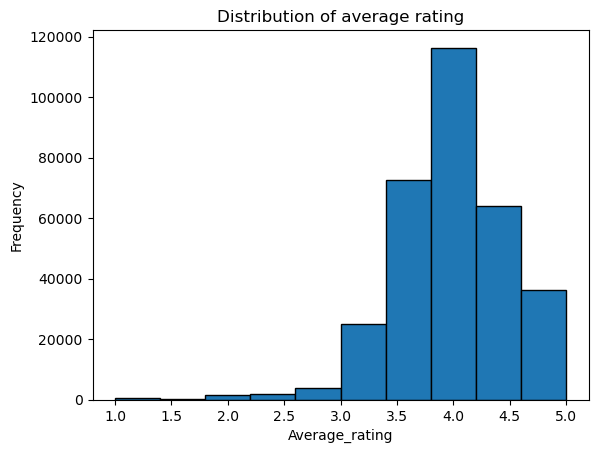

In [11]:

# we also provided a plot of how the average rating distributes

plt.hist(authors['average_rating'], range=(1, 5), edgecolor='black')
plt.xlabel('Average_rating')
plt.ylabel('Frequency')
plt.title('Distribution of average rating')
plt.grid(False)
plt.show()

In [12]:
authors[authors['average_rating'] == 5].sort_values(by="text_reviews_count", ascending=False) 
# we have many authors that are 5 star rated on average, but we can see that many of those have few ratings count,
# so it's a biased statistic, for that reason when sorting by rating, we break ties by sorting with ratings count

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
71067,221.0,5.0,173,"[57855072, 47968559, 46146610, 57808717, 49299...","[36218894, 27965019, 26179383, 36186056, 29069...",19,14238716,Jennifer McVey,female,"Jennifer McVey, Cht (Certified Clinical Hypnot...",12
109251,1463.0,5.0,67,"[26151334, 26736992, 26151383, 40721888, 41879...","[18478858, 18806116, 18478882, 21419541, 22449...",11,7263689,Travis S. Miller,male,Travis is a graduate of Wichita State Universi...,228
144373,100.0,5.0,65,"[85992512, 85619533, 64200532, 63739932, 86850...","[55159796, 54871817, 41089735, 40893110, 55691...",8,18222212,Naser Banaqeeb,,"Naser Banaqeeb is a writer from Hyderabad, Ind...",14
312536,63.0,5.0,53,[85129259],[54560181],1,20517816,Crystal Napolitano,,Crystal moved from Pennsylvania to live in cen...,13
307595,38.0,5.0,39,[75194492],[50271828],1,19887261,D.J. Colbert,female,DJ Colbert was born and raised in the Boston a...,3
...,...,...,...,...,...,...,...,...,...,...,...
264593,3.0,5.0,0,"[21837776, 24565393]","[16053451, 17607254]",2,6477573,M.H. Rakib,male,"""Muddasir Habib""(Urdu:مدثرحبیب) is of 21, ""Rak...",14
264610,3.0,5.0,0,"[43696881, 45881685]","[24103312, 25973336]",2,11293647,Şevket Beysanoğlu,male,"Yazar, araştırmacı. Diyarbakır'ın Kemerseki ya...",0
264633,2.0,5.0,0,"[73556158, 58793667]","[49949251, 36986641]",2,16799808,Jason Scott Montoya,,"Now a full-time freelancer, Jason originally m...",3
264655,2.0,5.0,0,"[52161274, 21594057]","[31456344, 15848552]",2,6477624,Kevin Richard McNulty,male,Kevin McNulty is a considered a true thought-l...,4


In [13]:
# but we can also see that there's no author that has avg rating between 0 and 1, so the rating scale is 1 to 5

authors[(authors['average_rating'] >= 0.1) & (authors['average_rating'] <= 0.9)]

# in the further points of the homework we will analyze in detail this table.


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count


In [14]:
# text reviews count

authors.text_reviews_count.describe().apply(lambda x: '%.2f' % x)

count    351763.00
mean        330.69
std        3855.13
min           0.00
25%           1.00
50%           8.00
75%          53.00
max      608956.00
Name: text_reviews_count, dtype: object

In [15]:
# the writer that has the most text reviews is Stephen King. No surprise; he's one of the most famous

authors[authors['text_reviews_count'] == authors['text_reviews_count'].max()]

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
96,15195579.0,4.04,608956,"[849585, 150259, 1742269, 3230869, 1552134, 46...","[11588, 830502, 149267, 10614, 10592, 43615, 1...",1762,3389,Stephen King,male,Stephen Edwin King was born the second son of ...,766035


In [16]:
#works_count

authors.works_count.describe().apply(lambda x: '%.2f' % x)


count    351763.00
mean         19.56
std         480.41
min           0.00
25%           2.00
50%           6.00
75%          15.00
max      186086.00
Name: works_count, dtype: object

In [17]:
authors[authors['works_count'] == authors['works_count'].max()]

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
0,8510.0,4.02,527,"[21723362, 22939358, 22945924, 22579311, 22982...","[15971714, 16706030, 16712573, 16392251, 16739...",186086,5823409,Jesse Russell,male,"Bookvika Publishing, VSD, Book on Demand Ltd —...",164


In [18]:
authors[authors['works_count'] == authors['works_count'].min()]

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
351760,0.0,NaN,0,[],[],0,17146018,Kamryn Hart,female,"Kamryn Hart (also known as <a href=""https://ww...",59
351761,0.0,NaN,0,[],[],0,495244,L. Adams Beck,female,"Elizabeth Louisa ""Lily"" Moresby was born on la...",3
351762,0.0,NaN,0,[],[],0,304399,W.H. James Weale,male,William Henry James Weale (8 March 1832 – 26 A...,0


In [19]:
#fans_count

# same thing happened here as we saw while analyzing the ratings_count column
# we cannot have negative count value so we change value to None

authors[authors['fans_count'] < 0]
authors['fans_count'] = authors['fans_count'].apply(lambda x: None if x <= 0 else x)
print(authors.fans_count.describe().apply(lambda x: '%.2f' % x))


count    269413.00
mean        145.70
std        3039.82
min           1.00
25%           2.00
50%           8.00
75%          32.00
max      766035.00
Name: fans_count, dtype: object


In [20]:
# Turns out that Stephen King is also the author with the largest number of fans

authors[authors['fans_count'] == authors['fans_count'].max()]

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,about,fans_count
96,15195579.0,4.04,608956,"[849585, 150259, 1742269, 3230869, 1552134, 46...","[11588, 830502, 149267, 10614, 10592, 43615, 1...",1762,3389,Stephen King,male,Stephen Edwin King was born the second son of ...,766035.0


In [21]:
# we can provide also statistics for the qualitative variable 'gender'

authors['gender'].value_counts()

# we can see that many entries have '' as value, so we can firstly substitute the value in 'Not Specified'


male                      138179
female                    109878
                          103373
non-binary                    48
genderqueer                   28
                           ...  
Male                           1
Sin                            1
void                           1
Genderqueer transfemme         1
Twin Flames                    1
Name: gender, Length: 150, dtype: int64

In [22]:
authors['gender'] = authors['gender'].replace('', 'Not Specified')
# We can get a funny output if we print all the values that appear in the 'gender' column

authors['gender'].unique()

array(['male', 'Not Specified', 'female', 'Trans', 'Nonbinary',
       'Gender Apathetic', 'mustache machine', 'complicated ;)',
       'non-binary', 'non-binary genderqueer', 'gender fluid', 'Enby',
       'Rodent', 'Agender', 'agender',
       "Probably not relevant: if you think it is, provide your reasons and I'll consider it",
       'genderqueer', 'Non-binary', 'Adrogynous', 'Neutrois',
       'Androgynous', 'Genderfluid', 'Spirits have no gender or age',
       'transmasculine', 'Wife & Hubby Duo', 'Genderless', 'Author', 'NB',
       'Sissy', 'Bigender', 'non-binary/transmasculine', 'Unknown',
       'None', 'Wolf', 'Them', 'Trans Masculine Non-binary',
       'Genderqueen', 'Under a female thumb', 'Non-Binary Transgender',
       'Transwoman', 'genderfluid', 'Femme', 'wizardess',
       'gender fluid woman', "lesbian in a man's body ;)", 'Neutral',
       'Non-Binary', 'none', 'Greygender, genderfluid', 'transgender',
       'Spirit', 'Muppet', 'transfeminine', 'transgender pe

In [23]:
# in a few cases, some authors have dumb names under the column, so we can group those that are
# different from the binary gender ('male' and 'female') under the value 'Not Specified / other'
# just for make our operation more confortable (better to specify these days...)

authors['gender'] = authors['gender'].apply(lambda x: 'Not Specified/other' if x not in ['male', 'female'] else x)
print(authors['gender'].value_counts())


male                   138179
female                 109878
Not Specified/other    103706
Name: gender, dtype: int64


___
#### Books


In [24]:
# we dropped a few columns that are not needed for the HW just to make the dataset lighter
# Now we have a large dataset with 19 columns. Within them we can see something common with the authors dataset
# like ratings count, text reviews count and also variables like id, work_id, author_name, author_id are linked 
# with the authors dataset.
# We have the columns 'publication_date' and 'original_publication_date' that are provided as strings.
# We will have to change them in datetime type.
# Other relevant columns are the number of pages of a book (provided as a string), the series id, name and position
# and also we have a variable ('rating_dist') that shows us the number of ratings for each score.

print(books.dtypes)
print(books.shape)

id                             int64
title                         object
author_name                   object
author_id                      int64
work_id                        int64
language                      object
average_rating               float64
rating_dist                   object
ratings_count                  int64
text_reviews_count             int64
publication_date              object
original_publication_date     object
format                        object
image_url                     object
num_pages                     object
series_id                     object
series_name                   object
series_position               object
description                   object
dtype: object
(7027431, 19)


In [25]:
# now we briefly look at the books dataset 

books.head(1)

,id,title,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,image_url,num_pages,series_id,series_name,series_position,description
0,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,2809203,eng,4.5,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,https://i.gr-assets.com/images/S/compressed.ph...,870,45175,Harry Potter,5,There is a door at the end of a silent corrido...


In [26]:
# average rating
books["average_rating"] = books.average_rating.apply(lambda x: None if x <=0 else x)
books.average_rating.describe().apply(lambda x: '%.2f' % x)

count    6017152.00
mean           3.86
std            0.51
min            1.00
25%            3.62
50%            3.90
75%            4.13
max            5.00
Name: average_rating, dtype: object

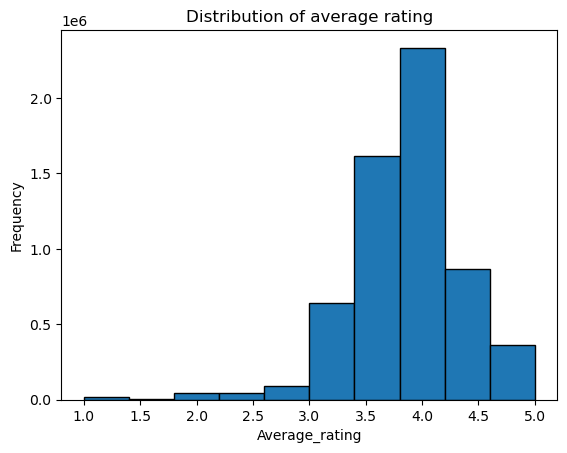

In [27]:
plt.hist(books['average_rating'], range=(1, 5), edgecolor='black')
plt.xlabel('Average_rating')
plt.ylabel('Frequency')
plt.title('Distribution of average rating')
plt.grid(False)
plt.show()

# we can see that the histogram is pretty much the same as we saw in the authors table

In [28]:
# ratings count
books.ratings_count.describe().apply(lambda x: '%.2f' % x)
books[books['ratings_count'] == books['ratings_count'].max()]

,id,title,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,image_url,num_pages,series_id,series_name,series_position,description
5236525,19447979,Harry Potter und der Stein der Weisen (Harry P...,J.K. Rowling,1077326,4640799,ger,4.48,5:4816896|4:1686742|3:625026|2:146377|1:125598...,7400639,117296,2012-04-24,1997-06-26,Kindle Edition,https://i.gr-assets.com/images/S/compressed.ph...,335,45175,Harry Potter,1,Harry Potter's life is miserable. His parents ...


In [29]:
# text reviews count

print(books.text_reviews_count.describe().apply(lambda x: '%.2f' % x))
books[books['text_reviews_count'] == books['text_reviews_count'].max()]

count    7027431.00
mean         641.73
std         4169.81
min            0.00
25%            0.00
50%            5.00
75%           64.00
max       174524.00
Name: text_reviews_count, dtype: object


,id,title,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,image_url,num_pages,series_id,series_name,series_position,description
5182806,19304768,"The Hunger Games (Hunger Games, #1)",Suzanne Collins,153394,2792775,en-US,4.32,5:3572190|4:1993815|3:772952|2:178537|1:97671|...,6615165,174524,,2008-09-14,,https://s.gr-assets.com/assets/nophoto/book/11...,,73758,The Hunger Games,1,The astonishing best-seller is now a fantastic...


In [30]:
# we can observe that JK Rowling has the highest number of ratings and text reviews
# num pages

# now as 'num_pages' have string entries we turn all the values into integers.
# We turn into Nones and not 0s because we expect that the empty string values correspond to formats that aren't 
# proper books, like CDs or audibles.

books['num_pages'] = books['num_pages'].apply(lambda x: int(x) if x != '' else x )
books['num_pages'] = books['num_pages'].apply(lambda x: None if x == '' else int(x))


____

2. [__RQ2__] *Let’s finally dig into this vast dataset, retrieving some vital information:*
    - Plot the number of books for each author in descending order.
    - Which book has the highest number of reviews?
    - Which are the top ten and ten worst books concerning the average score?
    - Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.
    - How many books have more than 250 pages?
    - Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

Done by: Yousef

    - Plot the number of books for each author in descending order.


In [ ]:

# we sort authors by works_count, this data is betetr visualized in a table, as there are around 300000 authors
authors = authors.sort_values(by="works_count", ascending=False)
authors[["name", "works_count"]].head(50)


,name,works_count
0,Jesse Russell,186086
1,Ronald Cohn,186047
2,Various,79378
3,Philip M. Parker,27480
4,U.S. Congress,25835
5,Books LLC,24975
6,Livres Groupe,23896
7,Walt Disney Company,19702
8,National Aeronautics and Space Administration,18643
9,Source Wikia,17483


,name,works_count
0,Jesse Russell,186086
1,Ronald Cohn,186047
2,Various,79378
3,Philip M. Parker,27480
4,U.S. Congress,25835
5,Books LLC,24975
6,Livres Groupe,23896
7,Walt Disney Company,19702
8,National Aeronautics and Space Administration,18643
9,Source Wikia,17483


    - Which book has the highest number of reviews?


In [79]:
# we get the book with the largest text_reviews_count using idxmax and loc
Highest_reviews = books['text_reviews_count'].idxmax()

book_highest_reviews = books.loc[Highest_reviews]['title']

print("Book with the most reviews: ", book_highest_reviews)


Book with the most reviews:  Dask Series Structure:
npartitions=50
    object
       ...
     ...  
       ...
       ...
Name: title, dtype: object
Dask Name: getitem, 353 tasks


    - Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.


{'eng': 1531949, 'spa': 137292, 'fre': 121062, 'ger': 148087, 'ara': 51034, 'por': 73162, 'mul': 2641, 'grc': 452, 'jpn': 41209, 'zho': 7623, 'dan': 12598, 'mun': 2, 'tur': 30686, 'nl': 63853, 'ita': 125287, 'gre': 18019, 'lat': 760, 'srp': 9301, 'rus': 34706, 'msa': 4299, 'swe': 20486, 'glg': 868, 'cat': 4628, 'wel': 344, 'heb': 2209, 'nor': 8990, 'kor': 2429, 'cze': 17919, 'gla': 122, 'ale': 4, 'per': 13475, 'lit': 6928, 'hun': 10796, 'fin': 19659, 'ind': 27994, 'pol': 27869, 'ira': 31, 'pes': 739, 'scr': 10698, 'gle': 285, '--': 228, 'ang': 21, 'afr': 1457, 'epo': 209, 'bul': 15766, 'rum': 19702, 'vie': 3660, 'sco': 347, 'tlh': 5, 'frs': 22, 'nno': 479, 'kan': 337, 'mar': 623, 'urd': 1130, 'isl': 2305, 'myn': 4, 'elx': 4, 'egy': 9, 'tam': 1689, 'hin': 1891, 'fil': 1165, 'tsn': 3, 'sqi': 652, 'ukr': 2111, 'nub': 1, 'tgl': 505, 'mal': 1452, 'ben': 5256, 'frm': 41, 'fro': 38, 'wak': 3, 'tgk': 6, 'nob': 1330, 'tha': 5066, 'sga': 2, 'est': 7796, 'zun': 6, 'nav': 6, 'slv': 6327, 'nld': 20

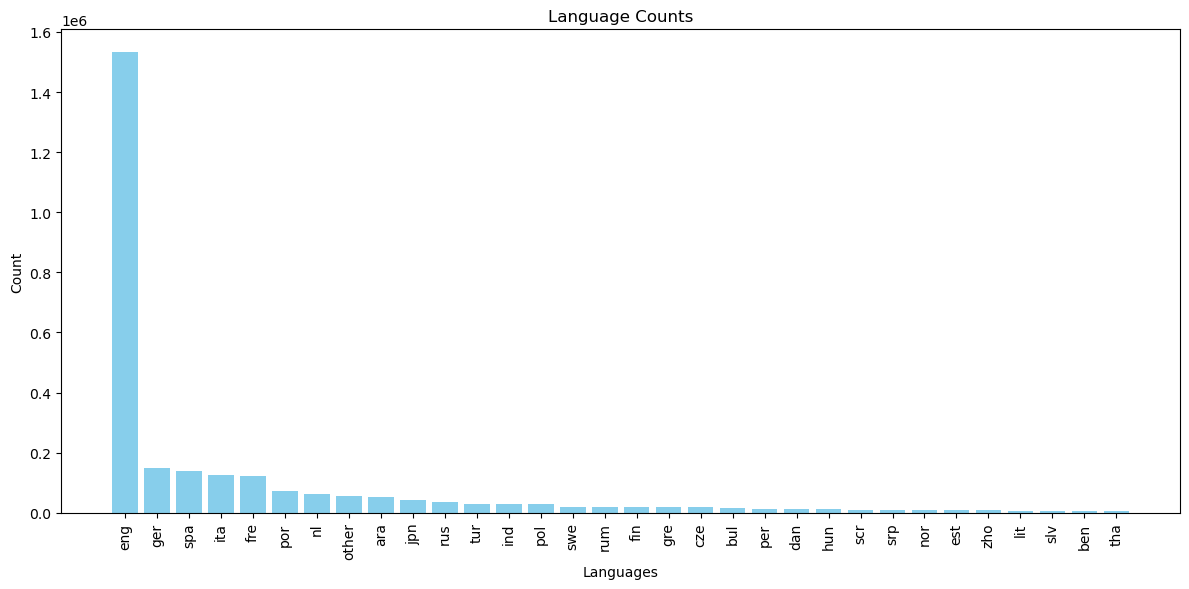

{'eng': 1531949, 'spa': 137292, 'fre': 121062, 'ger': 148087, 'ara': 51034, 'por': 73162, 'mul': 2641, 'grc': 452, 'jpn': 41209, 'zho': 7623, 'dan': 12598, 'mun': 2, 'tur': 30686, 'nl': 63853, 'ita': 125287, 'gre': 18019, 'lat': 760, 'srp': 9301, 'rus': 34706, 'msa': 4299, 'swe': 20486, 'glg': 868, 'cat': 4628, 'wel': 344, 'heb': 2209, 'nor': 8990, 'kor': 2429, 'cze': 17919, 'gla': 122, 'ale': 4, 'per': 13475, 'lit': 6928, 'hun': 10796, 'fin': 19659, 'ind': 27994, 'pol': 27869, 'ira': 31, 'pes': 739, 'scr': 10698, 'gle': 285, '--': 228, 'ang': 21, 'afr': 1457, 'epo': 209, 'bul': 15766, 'rum': 19702, 'vie': 3660, 'sco': 347, 'tlh': 5, 'frs': 22, 'nno': 479, 'kan': 337, 'mar': 623, 'urd': 1130, 'isl': 2305, 'myn': 4, 'elx': 4, 'egy': 9, 'tam': 1689, 'hin': 1891, 'fil': 1165, 'tsn': 3, 'sqi': 652, 'ukr': 2111, 'nub': 1, 'tgl': 505, 'mal': 1452, 'ben': 5256, 'frm': 41, 'fro': 38, 'wak': 3, 'tgk': 6, 'nob': 1330, 'tha': 5066, 'sga': 2, 'est': 7796, 'zun': 6, 'nav': 6, 'slv': 6327, 'nld': 20

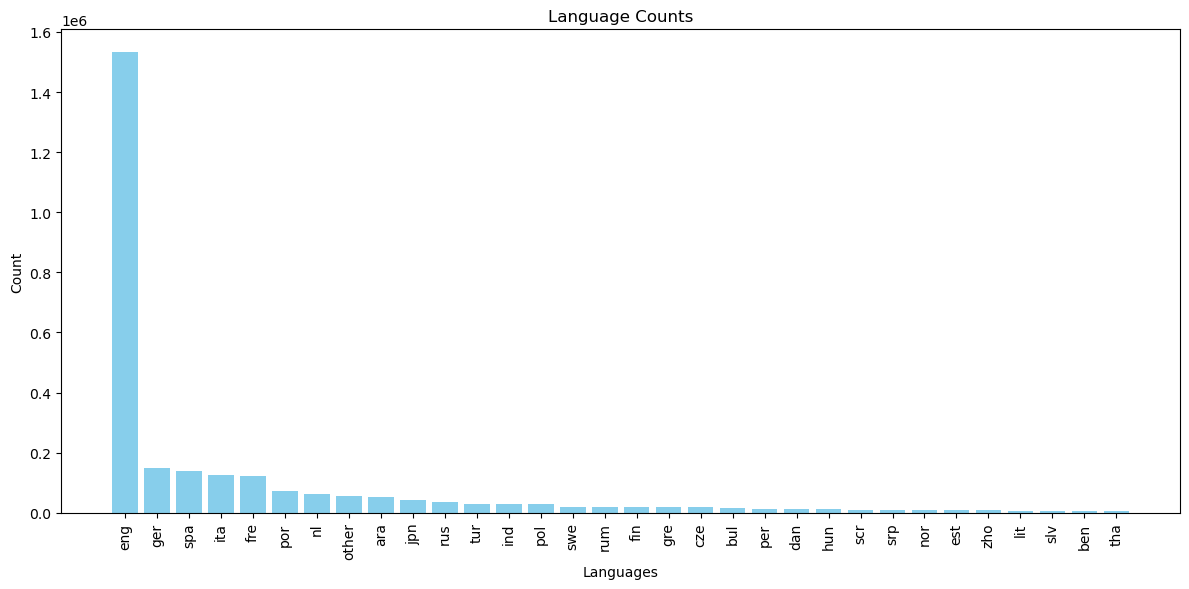

In [ ]:
lang = {}
# print(books["language"].unique())
# Initilize the languages into a dictionary, cleaning the data by grouping all languages labled 
# as  en-uk en-gb and such under english, and removing all entries without a language
for language in books["language"] :
    if language != "":    
        if language[0:2] == "en":
            lang["eng"] = 0
        else:
            lang[language] = 0

for language in books["language"]: 
    if language != "":            
        if language[0:2] == "en":
            lang["eng"] += 1
        else:
            lang[language]  += 1     
print(lang)
# we find Languages with counts less than 5000 and group them under other
keys_to_group = [key for key, value in lang.items() if value < 5000]

other_count = sum(lang[key] for key in keys_to_group)

# remove the keys we grouped from the original dataset
for key in keys_to_group:
    lang.pop(key)
lang["other"] = other_count

# sort  by decending count 
sorted_lang = dict(sorted(lang.items(), key=lambda item: item[1], reverse=True))

# visualize with matplotlib
labels = list(sorted_lang.keys())
counts = list(sorted_lang.values())
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color= 'blue')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Language Counts')

#  turn the values on the x-axis by 90 degrees for better readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# we can see that most books were published in english, with the top 7 all being european languages

    - How many books have more than 250 pages?


In [34]:
count=0
for number in books["num_pages"]:
    if str(number) != "NaN":
        if float(number)>250:

            count+=1
print("The number of books with more than 250 pages is: ", count)        

The number of books with more than 250 pages is:  1810335


    - Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

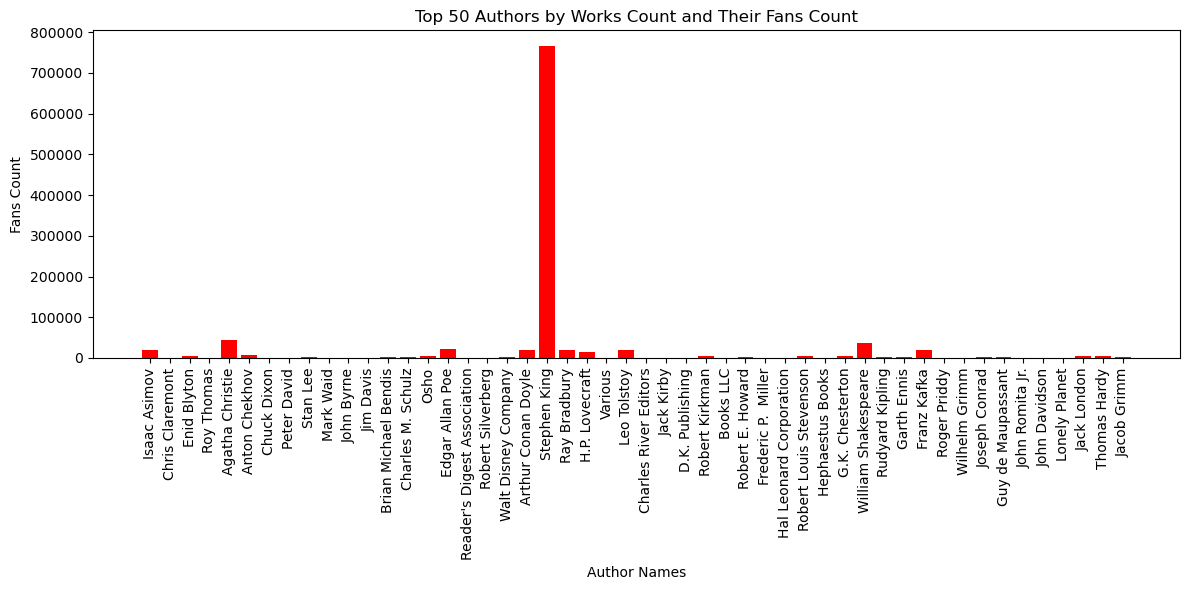

In [78]:
# i created a column called work_ids_count as i was curious to make sure that the length of work_ids is actually equal to length of works_count
authors['work_ids_count'] = authors['work_ids'].apply(len)
top_authors = authors.sort_values(by="work_ids_count", ascending=False).head(50)

# we get the 'name' and 'fans_count' columns
names = top_authors['name']
fans_count = top_authors['fans_count']

# visualize with matplotlib
plt.figure(figsize=(12, 6))
plt.bar(names, fans_count, color='red')
plt.xlabel('Author Names')
plt.ylabel('Fans Count')
plt.title('Top 50 Authors by Works Count and Their Fans Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# we can notice that being one of the most profilic authors doesnt necessarily mean that that author will have alot of fans.

____


3. [__RQ3__] *Let’s have a historical look at the dataset!*

    - Write a function that takes as input a year and returns as output the following information:

       - The number of books published that year.
   
       - The total number of pages written that year.
   
       - The most prolific month of that year.
   
       - The longest book written that year.
   
    - Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.
   
    - Ask **ChatGPT** or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it. 


Done by: Francesco

In [36]:
# 1)
# sets up pandas table display
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

#runtime around 1 min 10s
def historical_look(year):

    # Initialize a dictionary containg months
    months = {
    "january": 0,
    "february": 0,
    "march": 0,
    "april": 0,
    "may": 0,
    "june": 0,
    "july": 0,
    "august": 0,
    "september": 0,
    "october": 0,
    "november": 0,
    "december": 0
    }
    pages_written=0
    longest_book=0
    
    if year=="nan":
        return "nan","nan","nan","nan"
    
    # Create dataframe of books that are released that year
    books['original_publication_date'] = books['original_publication_date'].astype(str)
    filtered_books=books[books["original_publication_date"].str.startswith(year[:4])]
    
    # Calculate number of pages written that year
    for number in filtered_books["num_pages"]:
        try:
            number = int(float(number))
        except:
            pass
        if str(number).isnumeric():
            if int(number)>longest_book: # Calculate longest book
                longest_book=int(number)
            pages_written+=int(number) 

    # Extract title of longest book
    name_longest_book=filtered_books[filtered_books["num_pages"]==longest_book]["title"].values[0]

    
    for month in filtered_books["original_publication_date"]:
        if month.startswith("01", 5, 7):
            months["january"]+=1
        elif month.startswith("02", 5, 7):
            months["february"]+=1
        elif month.startswith("03", 5, 7):
            months["march"]+=1
        elif month.startswith("04", 5, 7):
            months["april"]+=1
        elif month.startswith("05", 5, 7):
            months["may"]+=1
        elif month.startswith("06", 5, 7):
            months["june"]+=1
        elif month.startswith("07", 5, 7):
            months["july"]+=1
        elif month.startswith("08", 5, 7):
            months["august"]+=1
        elif month.startswith("09", 5, 7):
            months["september"]+=1
        elif month.startswith("10", 5, 7):
            months["october"]+=1
        elif month.startswith("11", 5, 7):
            months["november"]+=1
        elif month.startswith("12", 5, 7):
            months["december"]+=1
    
   
    num_books=len(filtered_books)
    prolific_month = max(months, key=months.get).capitalize()
    
    return num_books, pages_written, prolific_month, name_longest_book

# if there are any parsing errors while converting values to datetime, Pandas will replace the problematic values with NaT (Not a Timestamp) instead of raising an error.
unique_years = pd.to_datetime(books['original_publication_date'], errors='coerce').dt.year.astype(str).unique()
unique_years = unique_years[unique_years.astype(float) <= 2023.0]
unique_years = sorted(unique_years)

stats_df = pd.DataFrame(columns=['year', 'num_books', 'total_pages', 'most_prolific_month', 'longest_book'])

# iterate through the first ten years
for year in unique_years[:10]:
    #print(year)
    stats=historical_look(year)
    new_row=pd.DataFrame({'year': int(float(year)), 'num_books': [stats[0]], 'total_pages': [stats[1]], 'most_prolific_month': [stats[2]], 'longest_book': [stats[3]]})
    stats_df = pd.concat([stats_df, new_row], ignore_index=True)


# iterate through the last ten years
for year in unique_years[-10:]:
    #print(year)
    stats=historical_look(year)
    new_row=pd.DataFrame({'year': int(float(year)), 'num_books': [stats[0]], 'total_pages': [stats[1]], 'most_prolific_month': [stats[2]], 'longest_book': [stats[3]]})
    stats_df = pd.concat([stats_df, new_row], ignore_index=True)
stats_df.head(20)


,year,num_books,total_pages,most_prolific_month,longest_book
0,1678,946,120058,February,"Pilgrim's Progress, The"
1,1679,31,2332,January,"Strange Stories from a Chinese Studio, Vol. 1 of 2 (Classic Reprint)"
2,1680,84,13352,September,"Discourses on Government. to Which Is Added, an Account of the Author's Life, and a Copious Index. 1st American Edition. 3 Vols."
3,1681,120,12774,January,The Buccaneers of America: A True Account of the Most Remarkable Assaults Committed of Late Years Upon the Coast of the West Indies by the Buccaneers of Jamaica and Tortuga
4,1682,395,41882,February,Komödien
5,1683,47,5402,October,"The Glory of Christ (Works of John Owen, Volume 1)"
6,1684,99,9193,February,Love-Letters Between a Nobleman and His Sister
7,1685,79,9262,September,"Seneca's Morals by Way of Abstract, of Benefits: Part I / By R. l'Estrange. (1685)"
8,1686,100,12250,January,The Major Works
9,1687,165,34329,July,The Principia: Mathematical Principles of Natural Philosophy


2)
####  ChatGPT implementation
 Below we can see the ChatGPT implentation of this question, I had to ask multiple questions in order to get an output without errors since there were problems with datatypes, for example:
1. The code makes sure that "num_pages" are int values and in case of missing values it counts it as 0
2. The section where we fill the DataFrame had problems in appending new values, I edited it taking inspiration by my implementation in order to not get an error (using pd.concat)
3. The implementation iterated through all the years of dataset, since it takes a long time, I aksed to iterate only through the first ten years and the last ten as the question asks
4. There are no entries for some months in the filtered dataset for a particular year, causing an empty sequence when attempting to find the most prolific month or title
5. Still after all this requests the output seems to be wrong, the main problem is that the AI doesn't know to properly handle value in a "wrong" format


In [ ]:
import pandas as pd

# Load the JSON file
df = books

# Convert "original_publication_date" to datetime
df['original_publication_date'] = pd.to_datetime(df['original_publication_date'], errors='coerce')

# Extract the year from the 'original_publication_date' column
df['year'] = df['original_publication_date'].dt.year

def book_stats(year: int):
    # Filter the DataFrame for the given year
    filtered_df = df[df['year'] == year]

    # Calculate the number of books published that year
    num_books = len(filtered_df)

    # Convert the 'num_pages' column to integers, replacing empty or invalid values with 0
    def convert_num_pages(x):
        try:
            return int(x)
        except (ValueError, TypeError):
            return 0
    filtered_df['num_pages'] = filtered_df['num_pages'].apply(convert_num_pages)

    # Calculate the total number of pages written that year
    total_pages = filtered_df['num_pages'].sum()

    # Find the most prolific month of that year, handling the case when month_counts is empty
    month_counts = filtered_df['original_publication_date'].dt.month.value_counts()
    
    if not month_counts.empty:
        most_prolific_month = month_counts.idxmax()
    else:
        most_prolific_month = "No data"

    # Find the longest book written that year, handling the case when filtered_df is empty
    if not filtered_df.empty:
        longest_book = filtered_df.loc[filtered_df['num_pages'].idxmax()]['title']
    else:
        longest_book = "No data"

    return {'year': year, 'num_books': num_books, 'total_pages': total_pages, 'most_prolific_month': most_prolific_month, 'longest_book': longest_book}

# Get the list of unique years in the dataset
unique_years = df['year'].unique()

# Filter the years to include only the first ten and the last ten
selected_years = unique_years[:10] if len(unique_years) > 10 else unique_years

# Create a list of dictionaries for the selected years
stats_data = [book_stats(year) for year in selected_years]

# Create the DataFrame
stats_df = pd.DataFrame(stats_data)

# Show the head and tail of the DataFrame
print(stats_df.head(10))
stats_df.tail(10)


____

4. [__RQ4__] *Quirks questions about consistency*. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.
     - You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?
     -  Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.
     -  What is the **longest book title** among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
     -  What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

Done by: Paolo

In [38]:
# 1)

# Let's have a look if we have duplicates among the author ids

if authors.id.is_unique:
    print("Author Ids are unique")

# seems to be no duplicates, but...

if not authors.name.is_unique:
    print("Author names are not unique")

# ... we have a few duplicate names if we focus on the column on the column 'name'

# We must check if the names are eponymous (authors that share the same exact name) or just duplicates

authors_ = authors['name'].value_counts()
dupl_auth = authors_[authors_ > 1]
dupl_auth

# here we can see which authors appear more than one time. Actually the ones that are duplicates never 
# appear more than two times.

# We must check if the names are eponymous (authors that share the same exact name) or just duplicates

authors_ = authors['name'].value_counts()
dupl_auth = authors_[authors_ > 1]
print("Number of double entries: ", len(dupl_auth))

# here we can see which authors appear more than one time. Actually the ones that are duplicates never 
# appear more than two times.

# to see this we wrote this for loop that takes every element of the list of the duplicate names in the authors dataset
# and create a 2-rows datset with the two rows of the authors table in which the name in position i appears
# then in order to see if the two are eponymous we check if the length of the union of their 'book_ids' lists
# corresponds to the length of the first row book_ids summed to the one of the second row
# (so if they have at least one same book id they will be duplicates)
# we put the eponymous in the list 'epo' and the duplicates in the list 'same'

epo = []
same = []


for i in range(len(dupl_auth.index)):
    auth_df = authors[authors['name'] == dupl_auth.index[i]]
    if len(list(set(auth_df['book_ids'].iloc[0] + auth_df['book_ids'].iloc[1]))) == len(auth_df['book_ids'].iloc[0]) + len(auth_df['book_ids'].iloc[1]):
        epo.append(dupl_auth.index[i])
    else:
        same.append(dupl_auth.index[i])
    
print(epo, same, sep = '\n')

# we can see that only a few of them are eponymous. We double checked looking at the column "about"
# and they actually are different people that share the same name and surname. 
# in some of the descriptions under 'about' there was a note from the librarian that said that in the dataset
# there are different authors with the same name

# TO DOUBLE CHECK IN THE COLUMN 'about'
#print(authors[authors['name'] == 'Peter Marshall'].iloc[0][-2])
#print(authors[authors['name'] == 'Peter Marshall'].iloc[1][-2])

Author Ids are unique
Author names are not unique
Number of double entries:  37
['Julie  Campbell', 'Peter    Green', 'Paul      Davies', 'Peter  Davies', 'Peter  Marshall', 'Caroline Miller', 'David  Nelson', 'Catherine   Jones']
['Robert W. Sullivan IV', 'Q. Hayashida', 'Peter      Marshall', 'Joseph Fink', 'Martin    Shaw', 'M.K. Graff', 'Cicerón', 'Dimitar Dimov', 'David Yates', 'Mike   Lee', '小野不由美', 'Chris Lynch', 'George  Franklin', 'Peter King', 'Katherine Mercurio Gotthardt', 'Jorge Molina', 'Hildegard von Bingen', 'William Messner-Loebs', 'محمد نجيب', 'Peter Green', 'Paul Graham', 'Christopher Phillips', 'Jackson Butch Guice', 'Erin  Bedford', 'James Kent', 'James C.L. Carson', 'Yordan Yovkov', 'Boris Zakhoder', 'John  Mole']


In [39]:
# 2)

if books.id.is_unique:
    print("Books IDs are unique.")
# we can see that there are no duplicate ids in the books dataset

def author_works_dic(author_ids: list):
    dic = {i: None for i in author_ids}   # create a dictionary where the keys are the author_ids in the input list 
    for i in author_ids:
        try:
            bks = authors[authors['id'] == i].iloc[0][4] # search for the book_ids list in the 5th column of the authors data frame
            ttls = list()                          # create a titles list
            for bk in bks:                    # if statement in case the book id in bks is not present in books dataframe
                if books[books['id'] == int(bk)].shape[0] != 0: 
                    ttls.append(books[books['id'] == int(bk)].iloc[0]['title']) # append the title for each book id in bks
            dic[i] = ttls               # assigning to the key of the dictionary the list of titles
        except IndexError:
            print("No author with ID: ", i)
    return dic

# let's try with a list with the ids of the authors Jude Fisher (10) and Heidi Fleiss (44)

authors_example = [ 44, 10]
saved_vals = author_works_dic(authors_example)

print(saved_vals)  # if we compare len(saved_vals[10]) and len(authors[authors['id'] == i].iloc[0][4])
                   # we can see that it can happen that not every book of the authors column 'book_ids' is found
                   # in the books dataframe, that's the reason of the if statement in the function.
                   # When a book is not found books[books['id'] == int(bk)] will have 0 rows,
                   # so we need this condition to go on


Books IDs are unique.
{44: ['Pandering', "The Player's Handbook: The Ultimate Guide on Dating and Relationships"], 10: ['The Lord of the Rings: The Return of the King: Visual Companion', 'The Lord of the Rings: The Fellowship of the Ring: Visual Companion', 'The Hobbit: An Unexpected Journey - Visual Companion', 'The Lord of the Rings: The Two Towers: Visual Companion', 'The Hobbit: The Desolation of Smaug - Visual Companion', "Sorcery Rising (Fool's Gold, #1)", "Wild Magic (Fool's Gold, #2)", "The Rose of the World (Fool's Gold, #3)", 'The Lord of the Rings: Complete Visual Companion', 'The Hobbit: The Battle of the Five Armies - Visual Companion']}


In [40]:
# 3)

# first we sort the table by the values of the average rating, and broke ties by soring between the number of ratings...

sorted_authors = authors.sort_values(by=['average_rating', 'ratings_count'], ascending=[False, False])


# ... and then we obtain the top 20

top_20_authors = sorted_authors.head(20)
top_20_authors

ratings_count  average_rating  text_reviews_count  \
109251         1463.0             5.0                  67   
71067           221.0             5.0                 173   
70643           165.0             5.0                   0   
84155           110.0             5.0                  10   
144373          100.0             5.0                  65   
41084            96.0             5.0                   0   
310410           84.0             5.0                   3   
197973           83.0             5.0                   0   
140642           79.0             5.0                   6   
7752             77.0             5.0                   0   
200311           77.0             5.0                   0   
206930           73.0             5.0                   0   
57041            65.0             5.0                  15   
291972           63.0             5.0                  24   
312536           63.0             5.0                  53   
25634            60.0             5.0                   0   
80634            54.0             5.0                  17   
112839           54.0             5.0                   0   
203280           52.0             5.0                  36   
276344           52.0             5.0                  17   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             work_ids  \
109251                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [26151334, 26736992, 26151383, 40721888, 41879327, 42695010, 43389528, 44926077, 26151450, 26151515, 46838353]   
71067                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [41]:
# 3)
top_20_auth_bks = []
top_20_auth_bks_name =[]
for i in range(0,20):
    top_20_auth_bks += top_20_authors['book_ids'].iloc[i]

length = 0
longest = None

for i in top_20_auth_bks:
    if books[books['id'] == int(i)].shape[0] != 0:
        top_20_auth_bks_name.append(books[books['id'] == int(i)].iloc[0]['title'])
        if len((books[books['id'] == int(i)].iloc[0]['title'])) > length:
            length = len((books[books['id'] == int(i)].iloc[0]['title']))
            longest = books[books['id'] == int(i)].iloc[0]['title']
        
print(length, longest)
book_longest_title_index = books['title'].str.len().idxmax()
book_longest_title = books.loc[book_longest_title_index, 'title']
print(len(book_longest_title), book_longest_title)


if length < len(book_longest_title):
    print("The longest book in the dataset is not written by a top 20 author.")


143 God's Little Flock Healed: They Will Rise on Wings Like Eagles: They Will Run and Not Get Weary; They Will Walk and Not Grow Weak. Isaiah 40:31
255 The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd...
The longest book in the dataset is not written by a top 20 author.


In [42]:
# 4)

# Let's find out which is the shortest title in the dataset
# lets assume that the shortest title a book can have is atleast one letter

books["title"] = books.title.apply(lambda x: None if x == "" else x)
shortest_titles = books[books['title'].str.len() == 1].sort_values(by=["text_reviews_count"], ascending=False)

print("There are multiple books with many ratings and reviews that have a one letter name.")
print("Some of them are the same book published in different formats and languages.")
shortest_titles.shape

# we verified these books by searching for them, and they are real books such as "a" by Andy Warhol

There are multiple books with many ratings and reviews that have a one letter name.
Some of them are the same book published in different formats and languages.


(665, 20)

5. [__RQ5__] *We can consider the authors with the most fans to be influential. Let’s have a deeper look.*
   - Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?
   - Have they published any series of books? If any, extract the longest series name among these authors.
   - How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it. 
   - Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:
     
         - https://bhm.scholasticahq.com/article/38021
     
         - https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49
     
         - https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962
     You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.

Done by: Yousef

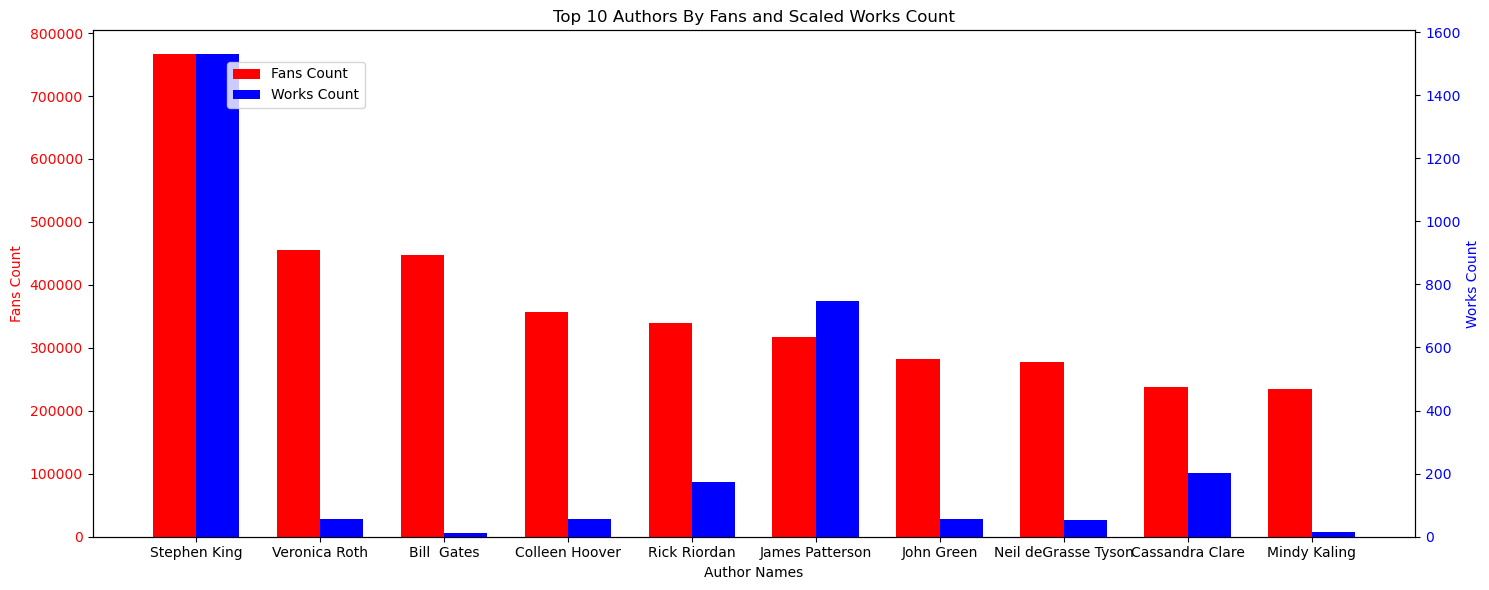

the most influential author is Stephen King.


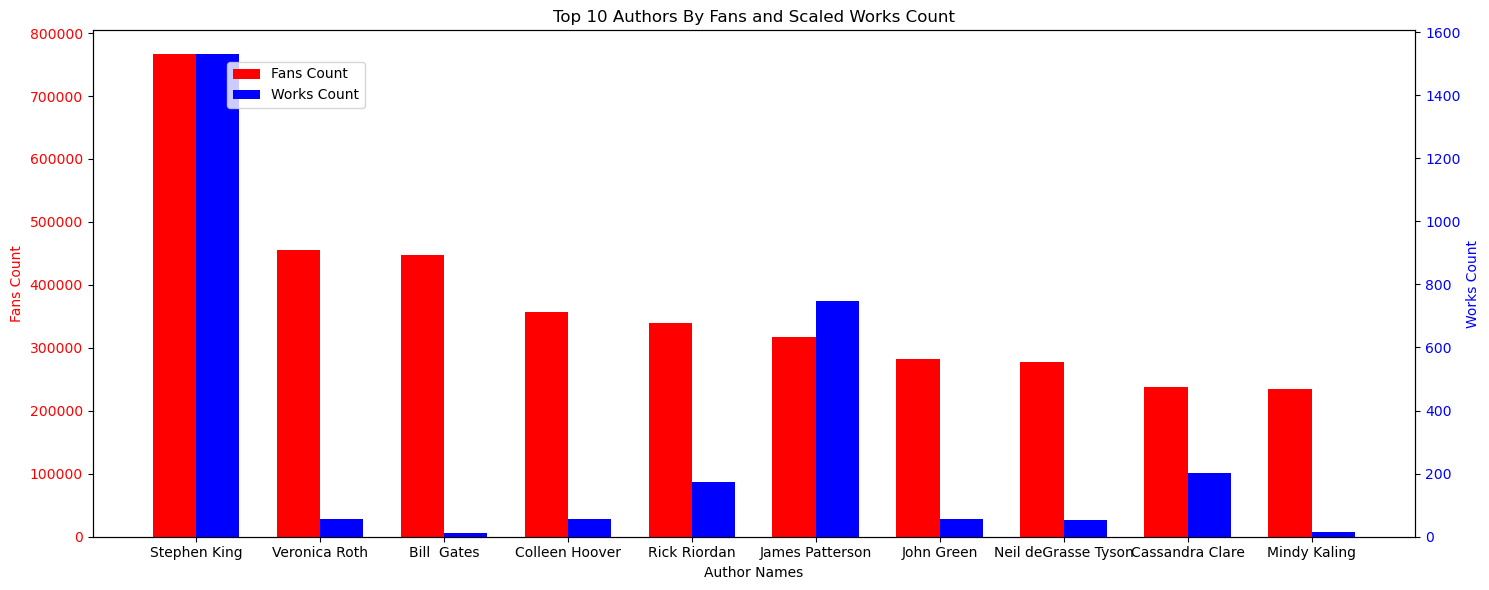

The most influential author is Stephen King.


In [ ]:
# 1)
import numpy as np
top_authors = authors[authors['work_ids_count'] != 0].sort_values(by=["fans_count", 'work_ids_count'], ascending=False).head(10)

# we get the 'name' and 'fans_count' columns for top authors
names = top_authors['name']
fans_count = top_authors['fans_count']
work_ids_count = top_authors["work_ids_count"]

#  we create an array of indices for the authors to determine number of x ticks to represent
indices = np.arange(len(names))

# the best way to visualize this plot is by a 2 bar histogram with each bar representing each of fans_count and works_id_count
fig, ax1 = plt.subplots(figsize=(15, 6))

# we create the bars for fans count on the left (red)
ax1.bar(indices, fans_count, .35, color='red', label='Fans Count')
ax1.set_xlabel('Author Names')
ax1.set_ylabel('Fans Count', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Now for the second axis
ax2 = ax1.twinx()

# Create the bars for scaled works count on the right (blue)
ax2.bar(indices + .35, work_ids_count, .35, color='blue', label='Works Count')
ax2.set_ylabel('Works Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set x-axis labels to author names
plt.xticks(indices + .35 / 2, names, rotation=90)
plt.title('Top 10 Authors By Fans and Scaled Works Count')
plt.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.9))
plt.show()

print("The most influential author is Stephen King.")
# we can also see that being a famous author doesnt necessarily mean you need to have alot of publishings, alot of these famous authors got their fame in other ways

In [44]:
# 2)
longest_series_name = {}

for author_name in top_authors['name']:
    author_books = books[books['author_name'] == author_name]
    
    # We find the series' published for each authors
    series_names = author_books['series_name'].dropna().unique()
    
    # Add the longest series under the authors name in our dictionary
    if len(series_names) > 0:
        longest_series = max(series_names, key=len)
        longest_series_name[author_name] = longest_series

# we display this info clearly for each author
for author, series_name in longest_series_name.items():
    print(f"Author: {author}")
    if series_name:
        print(f"Longest Series Name: {series_name}")
    else:
        print("No series were published by this author.")
    print()
# not all of these authors have published series    


Author: Stephen King
Longest Series Name: Everything's Eventual [Japanese]

Author: Veronica Roth
Longest Series Name: Divergent Japanese Split-Volume Edition

Author: Bill  Gates
No series published by this author.

Author: Colleen Hoover
Longest Series Name: Never Never

Author: Rick Riordan
Longest Series Name: Percy Jackson and the Olympians: The Graphic Novels

Author: James Patterson
Longest Series Name: The Best American Mystery Stories

Author: John Green
Longest Series Name: Will Grayson, Will Grayson

Author: Neil deGrasse Tyson
Longest Series Name: Merlin

Author: Cassandra Clare
Longest Series Name: The Mortal Instruments: Graphic Novel

Author: Mindy Kaling
No series published by this author.



{'Paperback': 5, 'ebook': 5, 'Audio CD': 3, 'Audiobook': 3, 'Hardcover': 2, '': 2, 'Audible Audio': 1, 'Kindle Edition': 1}
Author: Stephen King Formats: 53

Author: Veronica Roth Formats: 16

Author: Bill  Gates Formats: 8

Author: Colleen Hoover Formats: 11

Author: Rick Riordan Formats: 19

Author: James Patterson Formats: 33

Author: John Green Formats: 16

Author: Neil deGrasse Tyson Formats: 12

Author: Cassandra Clare Formats: 17

Author: Mindy Kaling Formats: 8



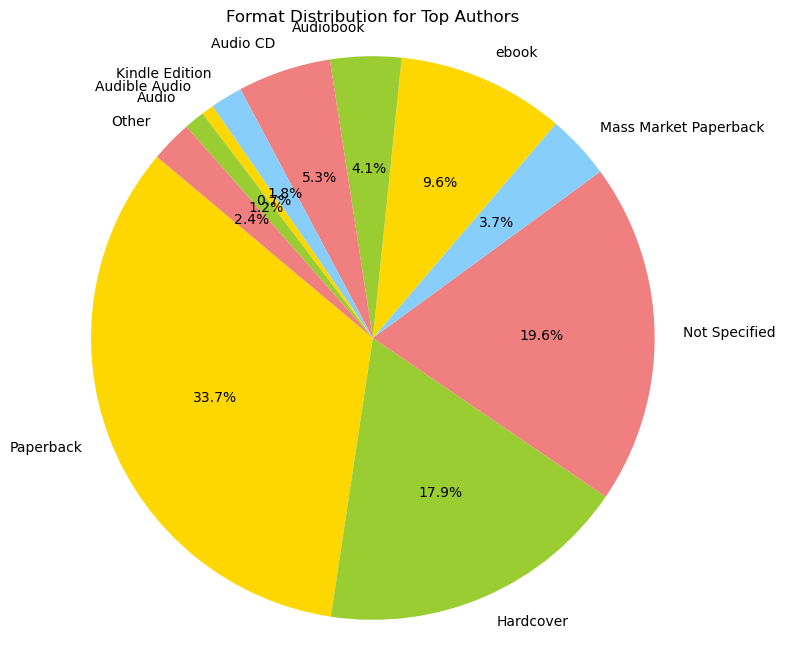

In [45]:
# 3)
author_format_counts = {}

# we create a disctionary of formats
for name in top_authors['name']:
    author_books = books[books['author_name'] == name]
    format_counts = author_books['format'].value_counts().to_dict()    
    author_format_counts[name] = format_counts
    
# for each author, we display the number of different formats
for author, format_counts in author_format_counts.items():
    print(f"Author: {author}",f"Formats: {len(format_counts.keys())}")
    print()
    
# Create a dictionary to store aggregated format counts
unique_format_counts = {}

# We sum format counts along all authors
for author_format_count in author_format_counts.values():
    for format, count in author_format_count.items():
        if format == "":
            format = "Not Specified"
        if format not in unique_format_counts:
            unique_format_counts[format] = count
        else:        
           unique_format_counts[format] += count

# We ombine formats with less than 50 counts overall into 'Other'
other_threshold = 100
other_count = 0
other_formats = []

for format, count in unique_format_counts.items():
    if count < other_threshold:
        other_count += count
        other_formats.append(format)

# drop formats that we grouped into 'Other'
for format in other_formats:
    del unique_format_counts[format]

unique_format_counts['Other'] = other_count

# The best way to visualize this data is in a pie chart
labels = unique_format_counts.keys()
sizes = unique_format_counts.values()

# Create a pie chart
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Format Distribution for Top Authors')
plt.show()   

# The most famous formats accounting for around 50% of all published books are paperbacks and hardcover books, 
# which is surprizing as i would have expected taht percentage to be higher, ut this shows the rise in popularity
# of ebooks and audiobooks.

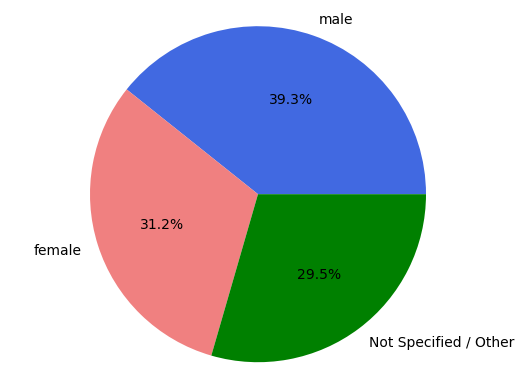

average_rating                                                 text_reviews_count                                                           fans_count                                                         
                               count      mean       std  min   25%   50%   75%  max              count        mean          std  min  25%   50%    75%       max      count        mean          std  min  25%   50%   75%       max
gender                                                                                                                                                                                                                               
Not Specified / Other        91028.0  3.999439  0.571071  1.0  3.70  4.00  4.33  5.0           103706.0  179.637437  2448.527585  0.0  0.0   4.0   27.0  358221.0    70018.0   88.142506  2619.805617  1.0  2.0   5.0  17.0  446876.0
female                      105218.0  4.010301  0.493492  1.0  3.73  4.00  4.30  5.0           109878.0  506.999217  5016.088341  0.0  3.0  17.0  107.0  606373.0    95272.0  208.302912  3010.005608  1.0  4.0  14.0  58.0  455358.0
male                        126187.0  3.949438  0.510983  1.0  3.69  3.97  4.23  5.0           138179.0  303.862627  3644.815054  0.0  1.0   7.0   44.0  608956.0   104123.0  127.135215  3316.323435  1.0  2.0   7.0  26.0  766035.0

In [46]:
# 4)
authors["gender"] = authors.gender.apply(lambda x: "Not Specified / Other" if x.lower() not in ["male", "female"] else x)             
plt.pie(authors['gender'].value_counts(), labels = authors['gender'].value_counts().index, autopct = '%1.1f%%', 
       colors = ['royalblue', 'lightcoral', 'green'])
plt.axis('equal')
plt.show()

columns = ["average_rating", "text_reviews_count", "fans_count"]

# Grouping by 'gender' and describing the specified columns
authors.groupby('gender')[columns].describe()

# We can notice from these basic statistics that the average rating is the same amongst all genders,
# but the average female author receives more reviews than the average male other, with Non specified
# receiving less than both by far. As for Fans count, Female authors have on average more fans, while
# the most popular author is male. All this information does not  reveal any structural bias in the 
# dataset in my opinion, nor does it reveal  any structural bias regarding the data acquisition methods
# this dataset was built from. Lets ask chat gpt next and see if we missed something.

4)According to GPT, Given the statistics above, and the distribution of the dataset:

The dataset reveals distinctive patterns in reader engagement metrics based on gender categories. Notably, males, females, and individuals listed under the 'Other/Not Specified' category demonstrate variance in key metrics. Females display higher average text reviews and fan counts, suggesting stronger reader engagement than males and the 'Other' category. Moreover, the 'Other/Not Specified' category indicates a slightly lower mean average rating compared to females but a higher rating than males. These differences might signify varied reception and recognition among different gender groups. While the dataset presents inherent biases due to a noticeable gender imbalance—39.3% males, 31.2% females, and 29.5% under 'Other/Not Specified'—the trends in reader engagement metrics underscore potential disparities in how authors from different gender categories are received and appreciated within the dataset. Understanding and addressing these disparities could provide insights into the nuanced landscape of author reception based on gender representation, contributing to a more comprehensive analysis and interpretation of the dataset.

It also suggested running statistics tests to analyze the significance of these variances between the gender groups, one thing that would be interesting to look at is how female authors were received over time, trying to notice when did they become more common based on fans count.



In [47]:
# 4)
# Let us try to apply this only to the top 10 authors
top_authors.groupby('gender')[columns].describe()

average_rating                                                      text_reviews_count                                                                                  fans_count                                                                                  
                             count      mean       std   min     25%    50%   75%   max              count           mean            std       min       25%       50%        75%       max      count           mean            std       min        25%       50%        75%       max
gender                                                                                                                                                                                                                                                                                  
Not Specified/other            4.0  3.957500  0.108743  3.85  3.8725  3.955  4.04  4.07                4.0  102391.250000  171115.386706     562.0   12365.5   25391.0  115416.75  358221.0        4.0  310477.500000   93452.377942  234647.0  267049.25  280193.5  323621.75  446876.0
female                         3.0  4.176667  0.109697  4.05  4.1450  4.240  4.24  4.24                3.0  311170.666667   92774.129585  240302.0  258667.5  277033.0  346605.00  416177.0        3.0  350183.666667  108542.796289  238560.0  297596.50  356633.0  405995.50  455358.0
male                           3.0  4.113333  0.181475  3.98  4.0100  4.040  4.18  4.32                3.0  432107.000000  153512.672138  333220.0  343682.5  354145.0  481550.50  608956.0        3.0  474140.333333  253034.111792  317040.0  328193.00  339346.0  552690.50  766035.0

4) When given these statistics about the top 10 authors by gender to gpt, it commented:
The dataset on the top 10 authors by gender reveals potential structural biases:

Imbalance in Representation: There's a higher count of authors categorized as "Not Specified / Other," possibly indicating underrepresentation or difficulty in accurately identifying genders.

Differences in Metrics: Slight variations in average ratings and significant differences in fan counts suggest potential biases in promotion, reader perceptions, and visibility across genders.

Biases in Data Interpretation: The dataset might suffer from grouping diverse gender identities under "Not Specified / Other," leading to a lack of nuanced understanding of preferences and disparities.

Addressing these biases requires more inclusive representation of authors and a deeper analysis of factors contributing to differences in recognition within the dataset.

We should note that biases in data interpretation might have been caused by the way we grouped genders as Not Specified / Other to facilitate grouping in the dataset.
____

6. [__RQ6__] *For this question, consider the top 10 authors concerning the number of fans again.*
   - Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
   - For each of the authors, give a convenient plot showing how many books has the given author published **UP TO** a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

Done by: Yousef

In [48]:
# 1)
top_authors = authors[authors['work_ids_count'] != 0].sort_values(by=["fans_count", 'work_ids_count'], ascending=False).head(10)

# get all books belonging to top 10 authors, sort, delete all empty publication date cells, 
# drop books in different formats with same original publication date to keep unique books
books_top_authors = books[books["author_id"].isin(top_authors["id"])]
books_top_authors = books_top_authors.sort_values(by=["author_id", "series_id", "series_position"], ascending=True)
books_top_authors = books_top_authors[books_top_authors["original_publication_date"] != ""]
books_top_authors = books_top_authors.drop_duplicates(subset=["work_id"])

# delete all  date cells that dont start with a year by checking teh first 4 characters in the string to be digits
books_top_authors['original_publication_date'] = books_top_authors['original_publication_date'].astype(str)
books_top_authors = books_top_authors[books_top_authors['original_publication_date'].str.match(r'^\d{4}', na=False)]

# format all original publication dates with only a year or only year and month to YYYY-01-01 in order to calculate time delta
# and transform all to datetime. We did this in order to avoid losing alot of dropped data.
books_top_authors.loc[books_top_authors['original_publication_date'].str.len() == 4, 'original_publication_date'] = books_top_authors.loc[books_top_authors['original_publication_date'].str.len() == 4, 'original_publication_date'] + '-01-01'
books_top_authors.loc[books_top_authors['original_publication_date'].str.len() == 7, 'original_publication_date'] = books_top_authors.loc[books_top_authors['original_publication_date'].str.len() == 7, 'original_publication_date'] + '-01'

# convert all date cells to datetime, and converting anything that would raise an error to NaT
books_top_authors["original_publication_date"] = pd.to_datetime(books_top_authors["original_publication_date"], errors = "coerce")
books_top_authors = books_top_authors.dropna(subset=["original_publication_date"])

series = books_top_authors[books_top_authors["series_id"] != "" ].sort_values(by="original_publication_date") 

time_deltas = series["original_publication_date"].diff()
time_deltas = time_deltas[time_deltas != pd.Timedelta(days=0)]
average_time_delta = time_deltas.mean()
print("Average time between publication dates of books in a series: " , average_time_delta)

not_series = books_top_authors[books_top_authors["series_id"] == "" ].sort_values(by="original_publication_date") 

time_deltas = not_series["original_publication_date"].diff()
time_deltas = time_deltas[time_deltas != pd.Timedelta(days=0)]
average_time_delta = time_deltas.mean()
print("Average time between publication dates of books not in a series: ", average_time_delta)

Average time between publication dates of books in a series:  58 days 09:18:22.040816327
Average time between publication dates of books not in a series:  73 days 20:33:35.017064846


I would have expected the average time between two publications in a series to be longer, When i tried calculating the average gap within each series and then averaging over the whole series then averaging for all series, i got a result around 3 years which is also not very realistic when examining the data upclose (around 1 year for 2 books within a series), but considering that these results take into account the publishing by any of these authors under each category, the results make more sense.
____

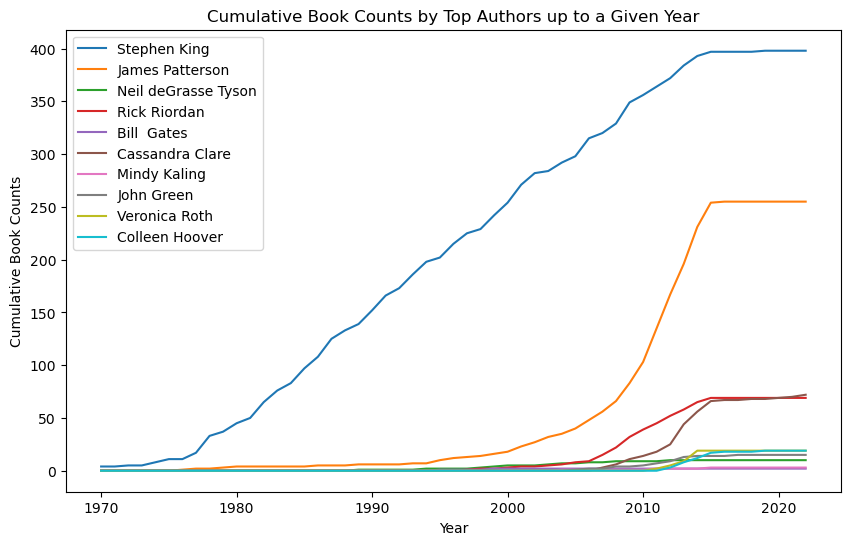

In [49]:
# 2)

# for the given range of years, we create an empty dataframe to store cumulative data by year in
years = range(1970, 2023)  
cumulative_counts = pd.DataFrame(index=years)

for author_id, author_df in books_top_authors.groupby('author_id'):
    auth_cum_count = []
    
    for year in years:
        count = len(author_df[author_df['original_publication_date'].dt.year <= year])
        auth_cum_count.append(count)

    name = books_top_authors[books_top_authors["author_id"] == author_id]["author_name"].iloc[0]
    cumulative_counts[name] = auth_cum_count

plt.figure(figsize=(10, 6))
for column in cumulative_counts.columns:
    plt.plot(cumulative_counts.index, cumulative_counts[column], label=str(column))

plt.title('Cumulative Book Counts by Top Authors up to a Given Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Book Counts')
plt.legend()
plt.show()

We can see from this graph that between the top 10 most profilic authors, Stephen King has been publishing the longest, followed by James Patterson, and as a result, they both have a much higher cumulative publishing count. James Patterson, Rick Riordan, and Cassandra Clare are contemporary with each other since they all released the majority of their books around the same time frame, and stopped also around the same time. Stephen Kings' publishing also declined around the same time as them but he has been publishing for much longer. The rest of the authors are all to some extent contemporary with each other and have published a similar amount of books.
_____

7. [__RQ7__] *Estimating probabilities is a core skill for a data scientist: show us your best!*
   - Estimate the probability that a book has over 30% of the ratings above 4.
   - Estimate the probability that an author publishes a new book within two years from its last work.
   - In the file [*list.json*](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries?select=list.json), you will find a peculiar list named **"The Worst Books of All Time."** Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
   - Are the events *X=’Being Included in The Worst Books of All Time list’* and *Y=’Having more than 700 pages’* independent? Explain how you have obtained your answer.

Done by: Nadir

In [ ]:
books_df = pd.read_json('lighter_books.json')
books_df.drop('description', axis=1, inplace=True)

In [ ]:
#1)
books_df[['rat5','rat4','rat3','rat2','rat1','ratto']] = books_df['rating_dist'].str.split('|',expand=True)

In [ ]:
books_df['rat5'] = books_df['rat5'].str.replace('5:', '')
books_df['rat4'] = books_df['rat4'].str.replace('4:', '')
books_df['rat3'] = books_df['rat3'].str.replace('3:', '')
books_df['rat2'] = books_df['rat2'].str.replace('2:', '')
books_df['rat1'] = books_df['rat1'].str.replace('1:', '')
books_df['ratto'] = books_df['ratto'].str.replace('total:', '')

In [ ]:
books_df['ratio_4plus'] = (books_df["rat5"].astype(int) + books_df["rat4"].astype(int))/books_df["ratto"].astype(int)

In [ ]:
books_df['bool_rq7'] = np.where(books_df['ratio_4plus'] >= 0.3, True, False)

In [ ]:
total_4plus = books_df['bool_rq7'].sum()
print(f'Total books with >30% ratings above 4: {total_4plus}')
print(f'Estimated probability of a book having >30% ratings above 4 is {total_4plus/len(books_df)}')

Total books with >30% ratings above 4: 5667707
Estimated probability of a book having >30% ratings above 4 is 0.8065119387155847


In [ ]:
#2)

books_df['original_publication_date'] = pd.to_datetime(books_df['original_publication_date'], errors='coerce')

books_df.dropna(subset=['original_publication_date'])

books_df.sort_values(by=['author_id', 'original_publication_date'], inplace=True)


In [ ]:
def is_within_2_years(series):
    time_diff = series['original_publication_date'].diff().dt.days
    is_duplicate_work = series['work_id'].duplicated(keep='first')
    return (time_diff <= 730).any() and not is_duplicate_work.any()

grouped = books_df.groupby('author_id')

probabilities = grouped.apply(is_within_2_years)

probability_2_years = probabilities.mean()

print("Probability of publishing a new book within 2 years:", probability_2_years)


Probability of publishing a new book within 2 years: 0.08911093220959211


In [4]:
# 3)
chunksize=10000

test = pd.read_json(r"./list.json", lines=True,chunksize=chunksize)

test=pd.concat(test,ignore_index=True)


In [5]:
test2 = test.loc[[0]]
test2.to_json('worstbooks.json', orient='records', lines=True)

In [57]:
import json
d = []
with open('worstbooks.json', 'r') as file:
    for line in file:
        d.append(json.loads(line))

list_df = pd.json_normalize(d, record_path=['books'])
list_df['book_id'] = list_df['book_id'].astype(int)

worst_books_uncond_df = (books.merge(list_df, left_on='id', right_on='book_id')
          .reindex(columns=['id', 'num_pages']))

book_700plus_df = books.loc[books['num_pages'] > 700]
worst_books = (book_700plus_df.merge(list_df, left_on='id', right_on='book_id')
          .reindex(columns=['id', 'num_pages']))

prob_x_union_y = worst_books.shape[0]/books.shape[0]
prob_x = worst_books_uncond_df.shape[0]/books.shape[0]
prob_x_given_y = prob_x_union_y/prob_x
print(f'Estimated conditional probability is {"%.4f" % prob_x_given_y}')

Estimated conditional probability is 0.0353


In [58]:
#4)
print(f'Pr(X) = {"%.6f" % prob_x}')

Pr(X) = 0.000886


We need to check whether $\Pr(X|Y) = \Pr(X)$. If true, then the events are independent, otherwise they are not independent. \
Since $\Pr(X|Y)$ is 0.035324, but $\Pr(X)$ is 0.000886, $X$ and $Y$ are not independent.

--------

8. [__RQ8__] *Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.*
   - Can you demonstrate that readers usually rate the longest books as the worst?
   - Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
   - About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
   - It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit *lazy*. Confirm or reject this with a convenient statistical test or a predictive model.
   - Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.


Done By: Nadir

In [59]:
#1)
books.dropna(subset=['num_pages', 'average_rating'], inplace=True)
count = len(books[books['num_pages'] > 4000])
print(f"Number of books with 'num_pages' > 4000: {count}")

Number of books with 'num_pages' > 4000: 870


Some entries in 'num_pages' column has erroneous values up to 2147483647.0
To deal with such entries we apply median values to any book which has more than 4000 pages.
These instances represented a very small fraction, approximately 0.03%, of the entire dataset.
This step helps maintain the integrity of our analysis by treating these extreme values as data errors or anomalies rather than valid data points and this approach helps ensure that the analysis is not unduly influenced by a few outliers.

In [60]:
median_num_pages = books['num_pages'].median()
books['num_pages'] = books['num_pages'].apply(lambda x: median_num_pages if x > 4000 else x)

In [61]:
# Exclude rows with no average_rating
books = books[books['average_rating'] > 0]

In [62]:
correlation_coefficient = books['num_pages'].corr(books['average_rating'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")

Correlation Coefficient: 0.1123


While there is a positive correlation (0.11) between book length ('num_pages') and reader ratings ('average_rating'), it is relatively weak. This suggests that, on average, longer books tend to receive slightly higher ratings, indicating that readers do not usually rate the longest books as the worst.
____

2)
Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

Based on the statistical analysis, we can conclude that there is a significant difference in the average rating distribution between English and non-English books. English books tend to have higher average ratings, and there is more variability in the ratings of non-English books.

In [ ]:
from scipy import stats

english_books = books[books['language'] == 'eng']
non_english_books = books[books['language'] != 'eng']

variance_english = np.var(english_books['average_rating'], ddof=1)
variance_non_english = np.var(non_english_books['average_rating'], ddof=1)

print(f"Variance of English books: {variance_english:.2f}")
print(f"Variance of non-English books: {variance_non_english:.2f}")

t_stat, p_value = stats.ttest_ind(english_books['average_rating'], non_english_books['average_rating'], equal_var=True)

mean_english = english_books['average_rating'].mean()
mean_non_english = non_english_books['average_rating'].mean()

print(f"p-value: {p_value}")
print(f"mean-english: {mean_english:.4f}")
print(f"mean-nonenglish: {mean_non_english:.4f}")

stats.ttest_ind(a=english_books['average_rating'], b=non_english_books['average_rating'], equal_var=True)

Variance of English books: 0.97
Variance of non-English books: 2.28
p-value: 0.0
mean-english: 3.6891
mean-nonenglish: 3.2133


Ttest_indResult(statistic=351.3347888104257, pvalue=0.0)

--------
3)
About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

In [ ]:
# Calculate statistics for English books
english_mode = english_books['average_rating'].mode().values[0]
english_mean = english_books['average_rating'].mean()
english_median = english_books['average_rating'].median()
english_q1 = np.percentile(english_books['average_rating'], 25)
english_q3 = np.percentile(english_books['average_rating'], 75)

# Calculate statistics for non-English books
non_english_mode = non_english_books['average_rating'].mode().values[0]
non_english_mean = non_english_books['average_rating'].mean()
non_english_median = non_english_books['average_rating'].median()
non_english_q1 = np.percentile(non_english_books['average_rating'], 25)
non_english_q3 = np.percentile(non_english_books['average_rating'], 75)

print("Statistics for English Books:")
print(f"Mode: {english_mode:.4f}")
print(f"Mean: {english_mean:.4f}")
print(f"Median: {english_median:.4f}")
print(f"First Quartile (Q1): {english_q1:.4f}")
print(f"Third Quartile (Q3): {english_q3:.4f}")

print("\nStatistics for Non-English Books:")
print(f"Mode: {non_english_mode:.4f}")
print(f"Mean: {non_english_mean:.4f}")
print(f"Median: {non_english_median:.4f}")
print(f"First Quartile (Q1): {non_english_q1:.4f}")
print(f"Third Quartile (Q3): {non_english_q3:.4f}")

Statistics for English Books:
Mode: 4.0000
Mean: 3.8947
Median: 3.9200
First Quartile (Q1): 3.6700
Third Quartile (Q3): 4.1500

Statistics for Non-English Books:
Mode: 4.0000
Mean: 3.8521
Median: 3.8900
First Quartile (Q1): 3.6000
Third Quartile (Q3): 4.1300


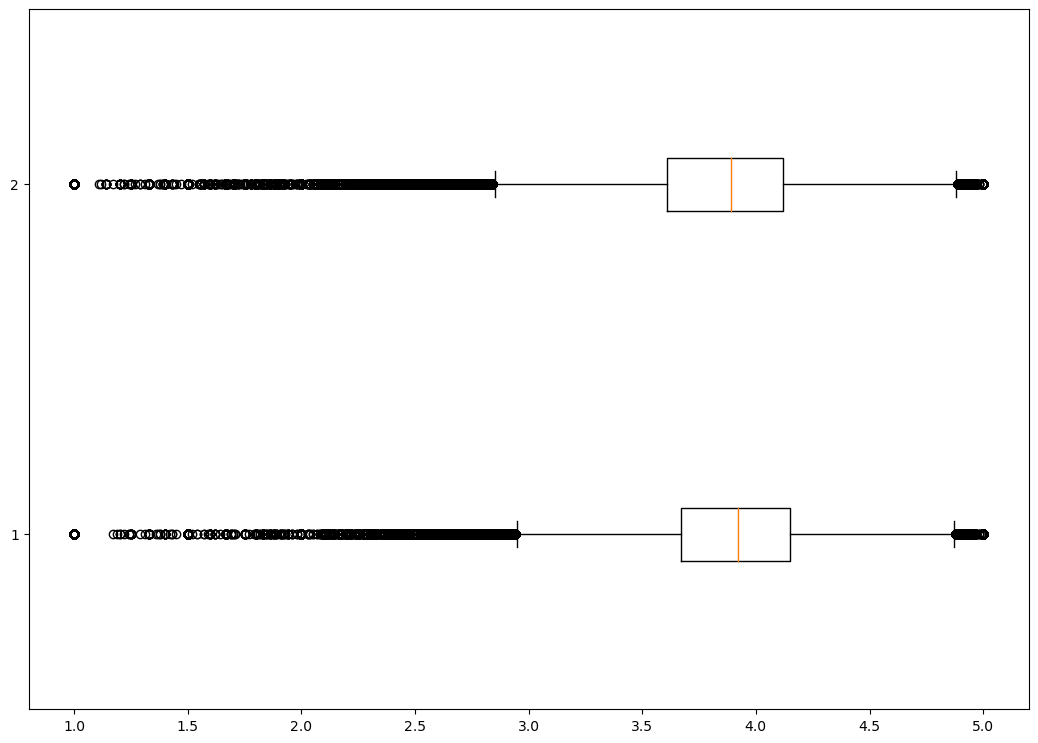

In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
data = [english_books['average_rating'], non_english_books['average_rating']]

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data, vert=0)
# show plot
plt.show()

--------
Question 4
It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

In [ ]:
authors_data = pd.read_json('lighter_authors.json', lines=True)

In [ ]:
from scipy import stats

correlation_coefficient, p_value = stats.pearsonr(authors_data['fans_count'], authors_data['text_reviews_count'])

print(f'Correlation coefficient is {correlation_coefficient:2f}\nP value is {p_value}')

Correlation coefficient is 0.694271
P value is 0.0


There is a statistically significant correlation between fans and reviews.
The correlation is positive, suggesting that authors with more fans tend to have more reviews.

--------
 5)
Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.



Most common statistical tests are: T-Tests, Analysis of Variance (ANOVA), Chi square tests, correlation analysis, regression analysis and nonparametric tests. 

**T-Test** is used to determine whether there is a significant difference between the means of two groups. It's particularly valuable when comparing sample data to make inferences about the population from which the samples are drawn. The hypothesis design for t-tests are described below: 


*Independent T-Test:*  
- H0: No significant mean difference between two groups.  
- H1: Significant mean difference.  

*Paired T-Test:*  
- H0: No mean difference in related groups.  
- H1: Mean difference.  

*One-Sample T-Test:*  
- H0: Sample mean = known population mean.  
- H1: Sample mean ≠ population mean.

**ANOVA** is designed to discern whether there are significant differences among the means of three or more groups. ANOVA is a powerful tool to explore the impact of multiple factors or categorical variables on a continuous outcome.
- H0: No mean difference among groups.  
- H1: Mean difference in at least two groups.

**Chi-Square Test** used to ascertain whether there is a significant association between two categorical variables. This test is particularly valuable for assessing the independence or dependence of variables within contingency tables. 
- H0: No association between categorical variables.  
- H1: Association between variables.

**Correlation Analysis** used to measure and understand the relationship between two continuous variables. It assesses the degree and direction of the association, helping to determine if changes in one variable correspond to changes in another. \
Spearman's Rank Correlation is more robust when data doesn't meet the assumptions of normality or when the relationship is not strictly linear. Pearson's Correlation is appropriate when the relationship is linear and data follows a normal distribution. 

*Pearson's Correlation:*  
- H0: No linear relationship.  
- H1: Linear relationship.  

*Spearman's Rank Correlation:*  
- H0: No monotonic relationship.  
- H1: Monotonic relationship.

**Regression Analysis** used to explore and quantify the relationship between one or more independent variables and a dependent variable. \
Linear regression is employed when the relationship between variables can be approximated by a straight line. Logistic regression is applied when the dependent variable is binary or categorical.
 
*Linear Regression:*  
- H0: No effect of independent variables on the dependent variable.  
- H1: Effect of independent variables.  

*Logistic Regression:*  
- H0: No association between independent variables and binary/categorical dependent variable.  
- H1: Association between variables.

**Nonparametric Tests**\
The choice between parametric and nonparametric tests hinges on the nature of data and the assumptions. Parametric tests are suitable when the data approximates a normal distribution, comprises continuous variables, and satisfies assumptions like equal variances. They tend to be more powerful and precise under these conditions. Nonparametric tests are preferred for non-normally distributed data, categorical or ordinal variables, and when parametric assumptions are violated. They are robust, accommodating smaller sample sizes and mixed data types. The decision of choice should align with the data characteristics and research objectives, with the possibility of comparing results from both types of tests for added confidence.

*Mann-Whitney U Test (Independent T-Test alternative):*  
- H0: No distribution difference between groups.  
- H1: Distribution difference.  

*Kruskal-Wallis Test (ANOVA alternative):*  
- H0: No distribution difference among groups.  
- H1: Distribution difference in at least two groups.


### Bonus points

**1.**
Done by: Francesco
- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

In [72]:
import dask.dataframe as dd
import time

start_time = time.time()

blocksize = "64 MiB"

# Read the json file
authors_df=dd.read_json(r"./lighter_authors_cleaned.json" , lines=True, blocksize=blocksize)

# Print only authors with at least 100 reviews
filtered_df = authors_df[authors_df["ratings_count"] > 100]
filtered_df = filtered_df.iloc[:,:1].compute()
print(filtered_df)

end_time = time.time()
execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
print(execution_time)

       ratings_count
0               8510
1               8896
2             332569
3                389
4                344
...              ...
73908            275
73910            288
73912            220
73913           1012
73914           1191

[132289 rows x 1 columns]
19427.162647247314


##### Now with pandas to compare results (same output)

In [73]:
import pandas as pd 
import time

start_time = time.time()

# Read the json file
authors_ = pd.read_json(r"./lighter_authors_cleaned.json", lines=True)

# Print only authors with at least 100 reviews
filtered_df = authors_[authors_["ratings_count"]>100]
filtered_df = filtered_df.iloc[:,:1]
print(filtered_df)

end_time = time.time()
execution_time = (end_time - start_time) * 1000  # Convert to milliseconds
print(execution_time)

        ratings_count
0                8510
1                8896
2              332569
3                 389
4                 344
...               ...
351749            275
351751            288
351753            220
351754           1012
351755           1191

[132289 rows x 1 columns]
175937.4325275421


As we can see the outputs are the same but with Dask module the code is slightly faster this is because Dask is designed to handle larger-than-memory datasets and parallelize operations, making it well-suited for tasks that require processing large amounts of data that don't fit in memory
_____

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload [books.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries), and join them with [authors.json](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) based on author_id. How many books don’t have a match for the author?


In [74]:
import dask.dataframe as dd

# define blocksize (useful for large file)
blocksize = "64 MiB"


# read the json file and concatenate the blocks
books = dd.read_json(r"./lighter_books_cleaned.json", lines=True, blocksize=blocksize)




In [75]:

# join them with a left join, so it's easier to check which books don't have a match for the author
merged_df = dd.merge(books, authors_df, left_on="author_id", right_on="id", how="left")

# create df with books not having match for author
book_without_author_df = merged_df[merged_df['author_id'].isnull()]

print(book_without_author_df.compute())
# I get output = 0 so every book has a match apparently

Empty DataFrame
Columns: [id_x, title, author_name, author_id, work_id, language, average_rating_x, rating_dist, ratings_count_x, text_reviews_count_x, publication_date, original_publication_date, format, image_url, num_pages, ratings_count_y, average_rating_y, text_reviews_count_y, work_ids, book_ids, works_count, id_y, name, gender, about, fans_count]
Index: []


**2.** *Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:*

- If you choose to text-mine [**books.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) **’ descriptions**, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.

- If you choose to text-mine [**authors.json**](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries)**’ about-field**, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.

- If you feel comfortable and did **both** tasks, analyze the matching of the two procedures. You grouped books and authors in genres. Do these two procedures show correspondence?

In [6]:
import pandas as pd

chunksize= 10000

chunk = pd.read_json("./lighter_authors_cleaned.json",lines=True,chunksize=chunksize)

authors=pd.concat(chunk,ignore_index=True)

In [8]:
# Define trigger words for each genre
genres = {
    'poetry': ['poetry', "verses", "Rhyme", "Stanza", "Poem", "Sonnet", "Metaphor", "Lyric", "Elegy", "Poet"],
    'drama': ["Play", "Theater", "Act", "Scene", "Dramatist", "Rehearsal", "Performance", "Director", "Playwright", "Theatrical", "drama"],
    'thriller': ["thriller", "Suspense", "Suspenseful", "Tension", "Thrill", "Suspicion", "Fear", "Intensity"],
    'comedy': ["comedy", "Humor", "Laughter", "Funny", "Joke", "Satire", "Hilarious", "Stand-up", "Parody", "Comic", "Entertainment", "Comical", "Entertaining"],
    'fantasy': ["fantasy", "Magic", "Enchanted", "Sorcery", "Wizards", "Dragons", "Quest", "Epic", "Magical", "Realm", "Elves", "Supernatural"],
    'romance': ["romance", "Love", "Relationship", "Passion", "Affection", "Heartfelt", "Emotion", "Romantic", "Intimacy"],
    'adventure': ["adventure", "Exploration", "Journey", "Discovery", "Quest", "Expedition", "Explorers", "Adventurous", "Courage"],
    'sports': ["sports", "Athletics", "Competition", "Game", "Athletes", "Team", "Victory", "Championship", "Training", "Sportsmanship", "Tournament"],
    'action': ["action", "Excitement", "Adrenaline", "Intensity", "Combat", "Danger", "Fighting", "Explosive"],
    'horror': ["horror", "Fear", "Terrifying", "Darkness", "Chills", "Gore", "Frightening", "Haunting", "Nightmare", "scary"],
    'musical': ["musical", "Music", "Song", "Singing", "Dance", "Tunes", "Melody", "Rhythm", "Broadway"],
    'mystery': ["mystery", "Suspense", "Enigma", "Clues", "Investigation", "Puzzle", "Detective", "Secrets", "Unsolved", "Crime"]
}


# Function to categorize authors based on trigger words
# we check if trigger words are inside description of author, if we don't find we just return "Other" genre
def categorize_author(description):
    for genre, keywords in genres.items():
        for keyword in keywords:
            if keyword in description.lower():
                return genre
    return 'Other'

# Create df of the first 100 columns of authors "about" just to test it
author_about=authors.iloc[:, [7, 9]]
author_about = author_about.head(100)

# Categorize authors
author_genres = [categorize_author(description) for description in author_about['about']]

# Print the results just to test it, we should group them in a dict (?) and count how many for each genre
for author, genre in zip(author_about['about'], author_genres):
    print(f"Author: {author}")
    print(f"Genre: {genre}")
    print()


Author: Bookvika Publishing, VSD, Book on Demand Ltd — automated print-on-demand books, content entirely sourced from WIKIPEDIA.<br /><br />Editor of Wikipedia article books.<br /><a target="_blank" rel="noopener nofollow" href="http://speedydeletion.wikia.com/wiki/Bookvika_Publishing">http://speedydeletion.wikia.com/wiki/...</a><br /><br /><a target="_blank" rel="noopener nofollow" href="https://en.wikipedia.org/wiki/OmniScriptum#Wikipedia_content_duplication">https://en.wikipedia.org/wiki/OmniScr...</a>
Genre: Other

Author: Bookvika Publishing, VSD, Book on Demand Ltd — automated print-on-demand books, content entirely sourced from WIKIPEDIA.<br /><br />Editor of Wikipedia article books.<br /><a target="_blank" rel="noopener nofollow" href="http://speedydeletion.wikia.com/wiki/Bookvika_Publishing">http://speedydeletion.wikia.com/wiki/...</a>
Genre: Other

Author: Various is the correct author for any book with multiple unknown authors, and is acceptable for books with multiple known

# Algorithmic Question (AQ)
Done by: Francesco

Assume you are working as a librarian at a public library in Rome. Some new books have arrived, and you are in charge of putting them on a shelf. Your supervisor will give you some instructions, and you will follow his. Each book has a unique ID, and your boss's instructions can be of the following types: 

- **L N** - place the book with ID = N on the shelf to the left of the leftmost existing book
- **R N** - place the book with ID = N on the shelf to the right of the rightmost existing book
- **? N** - Calculate the minimum number of books you must pop from the left or right to have the book with ID = N as the leftmost or rightmost book on the shelf.
  
You must follow your boss's instructions and report the answers to type 3 instructions to him. He guarantees that if he has a type 3 instruction for a book with a specific ID, the book has already been placed on the shelf. 

Remember that once you've answered a type 3 instruction, the order of the books <ins>does not change</ins>. 

**Input:**

The first line contains a single number, n, representing the number of your boss's instructions. The ith instruction the boss gives can be found at each of the following n lines. 

**Output:**

Print your boss's type 3 instructions in the order they appear in the input. 

**Examples:**

__Input 1__
```
L 75
R 20
R 30
L 11
? 75
L 12
L 15
? 20
```
__Output 1__
```
1
1
```
---
__Input 2__
```
R 1
L 2
L 3
L 4
? 3
R 5
R 6
L 7
L 8
? 4
L 9
R 10
R 11
L 12
L 13
? 11
? 3
```
__Output 2:__
```
1
2
0
6
```

1. Implement a code to answer the problem above.

In [ ]:
N =int(input())
shelf = []

for i in range(N):
    position, id = input().split()
    

    if position == "L":
        if(id not in shelf):
            shelf.insert(0,id)

    elif position == "R":
        if(id not in shelf):
            shelf.append(id)

    else:
        half_shelf = len(shelf)//2
        index = shelf.index(id)+1
        
        if (half_shelf-index<0):
            
            # it's in the second half so we count from right
            print(len(shelf)-index)

        else:

            # it's in the first half so we count from left (it's ok if it's in the middle)
            print(index - 1)



2. Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer.


#### ChatGPT answer
The overall time complexity of the code is dominated by the O(n) operations inside the loop. Therefore, the time complexity of the entire code is O(N^2), where N is the number of inputs. This is because for each input, we perform an operation that takes time proportional to the number of inputs.

#### Our analysis
I believe the answer provided by the chatbot is correct because:

1. The first operation is a for loop that runs N times, where N is the number of inputs. The time complexity of a for loop is O(N)
2. Inside the loop, there are three operations: checking if an element exists in a list, inserting an element into a list, and finding the index of an element in a list.
The "in" operator has a time complexity of O(n), the "index()" operator has a time complexity of O(N) and the "insert()" operator has a time complexity of O(1)

It makes sense that the overall time complexity is O(N^2)



3. Is the algorithm proposed in (1.) the __optimal__ one to produce the required output? If not, can you suggest a <ins>better algorithm</ins> to perform the same task?


I don't think the code provided is the fastest one since a time complexity of O(N^2) is high. A faster method would be to use Dictionaries since most operations have a time complexity of O(1).

The algorithm could be the following:

1. Store IDs inside dictionaries instead of lists and since operations are much faster.
2. For each position, instead of iterating over the list to find the index of the ID, we can simply retrieve its position from the dictionary, this allow us to check if ID is inside shelf or not with time complexity of O(1)
3. For the middle position calculation, we can simply iterate over the dictionary and count the number of IDs that are less than the middle ID. This will be much faster than iterating over a list.

Overall time complexity would be O(N)